# Evaluation Metrics for Classification


## Dataset

Dataset is Credit Card Data from book "Econometric Analysis" - [Link](https://github.com/Ksyula/ML_Engineering/blob/master/04-evaluation/AER_credit_card_data.csv)

Here's a wget-able link:

```bash
wget https://raw.githubusercontent.com/Ksyula/ML_Engineering/master/04-evaluation/AER_credit_card_data.csv
```

The goal is to inspect the output of different evaluation metrics by creating a classification model (target column `card`).

In [58]:
#@ IMPORTING LIBRARIES AND DEPENDENCIES:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

%matplotlib inline

In [49]:
#@ READING DATASET:
PATH = "../02-regression/housing.csv"
select_cols = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", 
               "median_income", "median_house_value", "ocean_proximity"]
data = pd.read_csv(PATH, usecols=select_cols)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [50]:
data["total_bedrooms"] = data.total_bedrooms.fillna(0)
data["median_house_value"] = np.log(data.median_house_value)

* Apply the log transform to median_house_value.
* Do train/validation/test split with 60%/20%/20% distribution.
* Use the train_test_split function and set the random_state parameter to 1.

In [51]:
#@ SPLITTING THE DATASET FOR TRAINING AND TEST:
random_state = 1
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=random_state)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=random_state)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

* We will use DictVectorizer to turn train and validation into matrices.

In [52]:
#@ IMPLEMENTATION OF DICTVECTORIZER:
train_dicts = df_train.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable.

Train a model with `max_depth=1`

In [54]:
#@ TRAINING THE REGRESSION MODEL:

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [55]:
#@ INSPECTION:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



/opt/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Answer: `ocean_proximity=INLAND`

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional-to make training faster)

In [56]:
rf = RandomForestRegressor(n_estimators=10, random_state=random_state, n_jobs=-1)
rf.fit(X_train, y_train)

#@ CALCULATING MEAN SQUARED ERROR:
y_pred = rf.predict(X_val)
mean_squared_error(y_val, y_pred)

0.06020098542592274

What's the RMSE of this model on validation?

* **0.05**
* 0.25
* 0.55
* 0.85

## Question 3
Now let's experiment with the `n_estimators` parameter

Try different values of this parameter from 10 to 200 with step 10.
Set `random_state` to `1`.
Evaluate the model on the validation dataset.

In [57]:
scores = []

for n in tqdm(range(10, 201, 10)):
    rf = RandomForestRegressor(n_estimators=n, random_state=random_state)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    
    scores.append((n, mse))
    
scores

[(10, 0.06020098542592274),
 (20, 0.057105779442822364),
 (30, 0.05538122876856864),
 (40, 0.054984527610740776),
 (50, 0.054295029741964713),
 (60, 0.05415424056325279),
 (70, 0.05391214339981424),
 (80, 0.05392976653864575),
 (90, 0.05379887462469828),
 (100, 0.053740128289375105),
 (110, 0.053654396828108825),
 (120, 0.05368450187884909),
 (130, 0.05371522828241398),
 (140, 0.05367116731556884),
 (150, 0.05363991685931704),
 (160, 0.0536339936027343),
 (170, 0.05360087252865755),
 (180, 0.05366911626833525),
 (190, 0.053678791381742884),
 (200, 0.05363733365234476)]

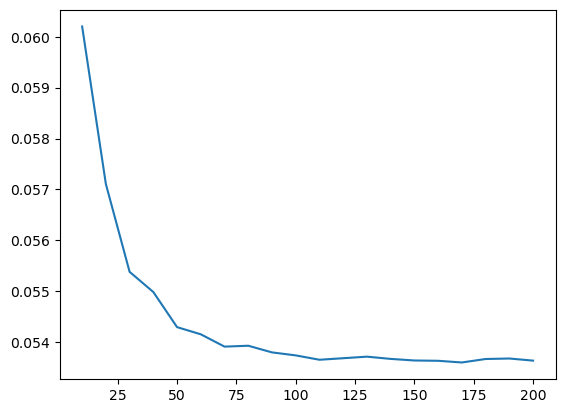

In [59]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'mse'])
plt.plot(df_scores.n_estimators, df_scores.mse)

After which value of n_estimators does RMSE stop improving?

* 10
* 50
* **70**
* 150


## Question 4
Let's select the best `max_depth`:

Try different values of `max_depth`: [10, 15, 20, 25]
For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
Fix the random seed: `random_state=1`

In [61]:
scores = []

for d in tqdm([10, 15, 20, 25]):
    for n in tqdm(range(10, 201, 10)):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=random_state)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
    
        scores.append((d, n, mse))

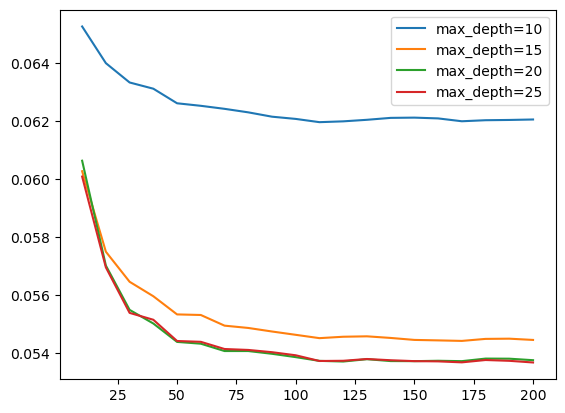

In [62]:
columns = ['max_depth', 'n_estimators', 'mse']
df_scores = pd.DataFrame(scores, columns=columns)

for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.mse,
             label='max_depth=%d' % d)

plt.legend()

What's the best max_depth:

* 10
* 15
* **20**
* 25

## Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field.

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

In [63]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=random_state, n_jobs=-1)
rf.fit(X_train, y_train)

array([1.68877189e-02, 3.29234611e-02, 1.00635995e-01, 9.68727768e-02,
       3.63889951e-01, 3.06679246e-03, 3.10901161e-01, 3.58566277e-04,
       2.70076860e-04, 4.21955925e-03, 3.00099243e-02, 1.90503564e-02,
       2.09136608e-02])

In [64]:
list(zip(rf.feature_importances_, dv.get_feature_names()))

/opt/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[(0.016887718926334967, 'households'),
 (0.032923461144368095, 'housing_median_age'),
 (0.10063599497727291, 'latitude'),
 (0.09687277681176, 'longitude'),
 (0.36388995120030987, 'median_income'),
 (0.0030667924625737133, 'ocean_proximity=<1H OCEAN'),
 (0.3109011605521532, 'ocean_proximity=INLAND'),
 (0.0003585662769167301, 'ocean_proximity=ISLAND'),
 (0.0002700768600650873, 'ocean_proximity=NEAR BAY'),
 (0.004219559248696653, 'ocean_proximity=NEAR OCEAN'),
 (0.030009924278211624, 'population'),
 (0.0190503564144456, 'total_bedrooms'),
 (0.020913660846891474, 'total_rooms')]

What's the most important feature?

* `total_rooms`
* **`median_income`**
* `total_bedrooms`
* `longitude`


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:
```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

In [89]:
#@ CREATING THE DMARTIX:
features = dv.feature_names_

regex = re.compile(r"<", re.IGNORECASE)
features = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in features]

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [90]:
# Setup evaluation, which is used to produce MSE 
watchlist = [(dtrain, 'train'), (dval, 'val')]

scores = {}

In [99]:
%%capture output

xgb_params = {
  'eta': 0.3,         # ETA - learning rate
  'max_depth': 6,
  'min_child_weight': 1,

  'objective': 'reg:squarederror',
  'nthread': 8,

  'seed': 1,
  'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [100]:
# Function for producing a dataframe
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_mse', 'val_mse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [101]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [102]:
scores['eta=0.3']

,num_iter,train_mse,val_mse
0,0,8.12733,8.13244
1,5,1.40218,1.40740
2,10,0.34481,0.35782
3,15,0.23575,0.26099
4,20,0.21461,0.24532
5,25,0.20356,0.24033
6,30,0.19462,0.23694
7,35,0.18687,0.23540
8,40,0.18073,0.23358
9,45,0.17626,0.23331


Which `eta` leads to the best RMSE score on the validation dataset?

* **0.3**
* 0.1
* Both gives same